In [2]:
import os
import numpy as np
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
from preprocessing_sequencing import preprocess_sequences as ps
%matplotlib inline

In [3]:
# put in path to processed data folder containing parameters yaml file 
parameters_path = pathlib.Path('/camp/lab/znamenskiyp/home/shared/projects/turnerb_A1_MAPseq/FIAA32.6a/Sequencing/TUR5514A4')

Load parameters

In [4]:
parameters = ps.load_parameters(directory=parameters_path)

Combine template switching tables to look set template switching cut-offs and UMI cut-offs

In [5]:
dir_path = pathlib.Path(parameters_path)
switching_tab = ps.combine_switch_tables(
        template_sw_directory=dir_path / "template_switching/analysed_chunks"
    )

starting combining samples into one big file


FileNotFoundError: [Errno 2] No such file or directory: '/camp/lab/znamenskiyp/home/shared/projects/turnerb_A1_MAPseq/FIAA32.6a/Sequencing/TUR5514A4/template_switching/analysed_chunks'

In [6]:
directory = pathlib.Path('/camp/lab/znamenskiyp/home/shared/projects/turnerb_MAPseq/A1_MAPseq/FIAA32.6a/Sequencing/Processed_data/UpdatedApril/preprocessed_seq_corrected/template_switching/analysed_chunks')
switching_tab = ps.combine_switch_tables(
        template_sw_directory=directory)#dir_path / "template_switching/analysed_chunks"
    

starting combining samples into one big file


(array([1.483926e+06, 2.013420e+05, 3.035780e+05, 3.539700e+05,
        4.729710e+05, 5.528450e+05, 3.072910e+05, 1.705500e+05,
        1.124940e+05, 6.355500e+04, 5.514400e+04, 7.045400e+04,
        7.185100e+04, 1.055480e+05, 1.011210e+05, 1.072460e+05,
        1.269400e+05, 9.547700e+04, 8.009700e+04, 7.267900e+04,
        4.169500e+04, 2.753100e+04, 1.966600e+04, 9.178000e+03,
        5.232000e+03, 3.648000e+03, 1.643000e+03, 1.231000e+03,
        6.860000e+02, 4.390000e+02, 3.470000e+02, 1.840000e+02,
        1.170000e+02, 8.400000e+01, 3.900000e+01, 2.700000e+01,
        1.400000e+01, 1.000000e+01, 3.000000e+00, 1.000000e+00,
        0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 2.000000e+00]),
 array([1.0, 6.36, 11.72, 17.080000000000002, 22.44, 27.8,
        33.160000000000004, 38.52, 43.88, 49.24, 54.6, 59.96,
        65.32000000000001, 70.68, 76.04, 81.4, 86.76, 92.12, 97.48, 102.8

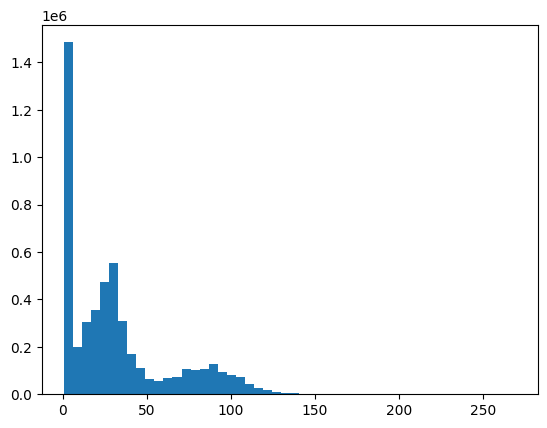

In [12]:
only_ones = switching_tab[switching_tab['different_neurons']==1]
plt.hist(only_ones["1st_abundant"], bins=50)

In [13]:
switching_tab

,total,different_neurons,1st_abundant,2nd_abundant,sequence_of_1st,sample_of_1st,chunk,UMI
0,99,3,97,1,TGCACAATTCAGGTCAATAACTTCGGGATGCTTTATATTGTTACTA,BC64,63,TTATATTGTTACTA
1,67,1,67,0,GTTATATGATCTGGTTTTGGTATGGAAATTTCTTCTAAACGCTAAA,BC64,63,TTCTAAACGCTAAA
2,97,2,96,1,TACAGTGTGCACGTGCTCCCCTTGATTCTGCTGATTTCCATTTGCC,BC64,63,GATTTCCATTTGCC
3,60,1,60,0,TGCACAATTCAGGTCAATAACTTCGGGATGCTTTTCACAAACCATA,BC64,63,TTTCACAAACCATA
4,88,1,88,0,TGATTACATCGCCTTGATATATCTTGTCGTTTCCCTCCATTTCCTA,BC64,63,CCCTCCATTTCCTA
...,...,...,...,...,...,...,...,...
29995,20,1,20,0,TCAATGTTGGCCAGATACATTCATCAGCATTCGCATTTTTCGTGAT,BC36,218,GCATTTTTCGTGAT
29996,29,2,28,1,ACCTGCAGGACCTGCGTACATCCATCCACTTTTGATGTTTCAGAGA,BC36,218,TGATGTTTCAGAGA
29997,5,1,5,0,CTGGCCGCTTGTGTGCATCTTCATGTATGTTTATGGGCAAGCCGTA,BC36,218,ATGGGCAAGCCGTA
29998,29,1,29,0,CGGCTTCTTCTCAAGGGATATTTTGGAATTTCTGGTGTTAGAAATT,BC36,218,TGGTGTTAGAAATT


In [ ]:
#to see how things look after removing template switching 'junk'
directory = pathlib.Path('/camp/lab/znamenskiyp/home/shared/projects/turnerb_MAPseq/A1_MAPseq/FIAA32.6a/Sequencing/Processed_data/UpdatedApril/preprocessed_seq_corrected/template_switching/analysed_chunks')
template_switching_check = pd.DataFrame(
        columns=[
            "UMI",
            "total",
            "different_neurons",
            "1st_abundant",
            "2nd_abundant",
            "sequence_of_1st",
            "sample_of_1st",
            "chunk",
        ]
    ).set_index("UMI")
print("starting combining samples into one big file", flush=True)
for file in os.listdir(directory):
    barcode_file = directory / file
    if barcode_file.stem.startswith("template_switching_chunk_"):
        bc_table = pd.read_csv(barcode_file)
        sample = barcode_file.stem.split("template_switching_chunk_", 1)[1]
        bc_table["chunk"] = sample
        template_switching_check = pd.concat([template_switching_check, bc_table])
#bla = pd.read_csv(directory / "template_switching/template_switching_all_seq.csv")

In [ ]:
#ignore duplicates
only_ones = template_switching_check[template_switching_check['different_neurons']==1]
plt.hist(only_ones["1st_abundant"], bins=50)
# plt.xticks(range(4),np.logspace(0,3,4))
plt.title('Number of reads per UMI post correction', fontsize=12)
plt.yscale('log')

plt.axvline(x = 4, color = "Black", label = "cut-off")
plt.legend(loc = 'upper right')
plt.xlabel('UMI counts')
plt.ylabel('Frequency')

In [ ]:
switches = template_switching_check[template_switching_check['different_neurons']>1]
plt.hist(switches[switches['1st_abundant']/switches['2nd_abundant']<10]['chunk'], bins=91)

In [ ]:
directory = pathlib.Path('/camp/lab/znamenskiyp/home/shared/projects/turnerb_MAPseq/A1_MAPseq/FIAA32.6a/Sequencing/Processed_data/UpdatedApril/preprocessed_seq_corrected')


In [ ]:
bla = pd.read_csv(directory / "template_switching/template_switching_all_seq.csv")

In [ ]:
bla

In [ ]:
barcode_file_range =96
dir_path = pathlib.Path(directory)
value_counts = pd.DataFrame()
out_dir = dir_path.joinpath("Final_processed_sequences")
pathlib.Path(out_dir).mkdir(parents=True, exist_ok=True)
for i in range(barcode_file_range):
    barcode = f"BC{i+1}"
    sample_file = dir_path / f"corrected_{barcode}.csv"
    if os.path.isfile(sample_file):
        sample_table = pd.read_csv(sample_file)
        sample_table["combined"] = (sample_table["corrected_sequences_neuron"]+ sample_table["corrected_sequences_umi"])
        total_counts =sample_table['combined'].value_counts().rename_axis('sequence').reset_index(name='counts')
        value_counts = pd.concat([value_counts, total_counts])

In [ ]:
plt.hist(value_counts["counts"], bins=100)
# plt.xticks(range(4),np.logspace(0,3,4))
plt.title('Number of reads per UMI post correction', fontsize=12)
plt.yscale('log')

#plt.axvline(x = 9, color = "Black", label = "cut-off")
plt.legend(loc = 'upper right')
plt.xlabel('UMI counts')
plt.ylabel('Frequency')

In [ ]:
value_counts.counts.sum()

In [ ]:
barcode_range =91
raw_value_counts = pd.DataFrame()
raw_path = pathlib.Path('/camp/lab/znamenskiyp/home/shared/projects/turnerb_MAPseq/A1_MAPseq/FIAA32.6a/Sequencing/Processed_data/New/')
for x in range(barcode_range):
        barcode_num = "BC" + str(x + 1) + ".txt"
        if barcode_num != 'BC36.txt' and barcode_num != 'BC65.txt':
            barcode_file = raw_path.joinpath(barcode_num)
            raw_bc = pd.read_csv(u
                barcode_file, delimiter="\t", skiprows=lambda x: (x != 0) and not x % 2
            )   
            raw_total_counts = raw_bc.value_counts().rename_axis('sequence').reset_index(name='counts')
            raw_value_counts = pd.concat([raw_value_counts, raw_total_counts])

In [ ]:
plt.hist(raw_value_counts["counts"], bins=100)
plt.title('Number of reads per UMI (pre error correction)', fontsize=12)
plt.yscale('log')

#plt.axvline(x = 9, color = "Black", label = "cut-off")
plt.legend(loc = 'upper right')
plt.xlabel('UMI counts')
plt.ylabel('Frequency')

In [ ]:
raw_value_counts['counts'].sum()

In [ ]:
plt.hist(value_counts["counts"], bins=200)
plt.title('Number of reads per UMI (pre error correction)', fontsize=12)
plt.yscale('log')

#plt.axvline(x = 9, color = "Black", label = "cut-off")
plt.legend(loc = 'upper right')
plt.xlabel('UMI counts')
plt.ylabel('Frequency')

In [ ]:
plt.hist(value_counts["counts"], bins=200)
# plt.xticks(range(4),np.logspace(0,3,4))
plt.title('Number of reads per UMI', fontsize=12)
plt.yscale('log')
plt.xlim(0,400)
plt.axvline(x = 9, color = "Black", label = "cut-off")
plt.legend(loc = 'upper right')
plt.xlabel('UMI counts')
plt.ylabel('Frequency')

In [ ]:
sorting_directory = '/camp/lab/znamenskiyp/home/shared/projects/turnerb_MAPseq/A1_MAPseq/FIAA32.6a/Sequencing/Processed_data/BC_split/temp/increased_cutoff'

sorting_dir = pathlib.Path(sorting_directory)
all_seq = pd.DataFrame()
for barcode_file in os.listdir(sorting_dir):
    if barcode_file.startswith("neuroncounts_"):
        to_read = pd.read_csv(sorting_dir/barcode_file)
        sequences = to_read["sequence"]
        all_seq =pd.concat([all_seq, sequences])
all_seq_unique =all_seq.value_counts().rename_axis('sequence').reset_index(name='counts')


In [ ]:
samples = list(range(1, 92))
zeros = np.zeros(shape=(len(all_seq_unique['sequence']),len(samples)))
barcodes_across_sample = pd.DataFrame(zeros, columns=samples)
barcodes_across_sample =barcodes_across_sample.set_index(all_seq_unique['sequence'])

In [ ]:
for file in os.listdir(sorting_directory):
    barcodefile= sorting_dir/file
    if barcodefile.stem.startswith("neuroncounts_"):
        toread = pd.read_csv(barcodefile)
        sample = int(barcodefile.stem.split("neuroncounts_BC", 1)[1])
        for r, sequence in toread["sequence"].items():
            barcodes_across_sample.loc[sequence,sample] = toread["counts"][r]
        

In [ ]:
summary = barcodes_across_sample.sum(axis=1)
plt.hist(summary, bins=3)


In [ ]:
min(summary)

In [ ]:
bla = barcodes_across_sample[29][barcodes_across_sample[29]>0]
bla

In [ ]:
barcodes_across_sample.loc['TTGTTTAGATAGTTTGTACCTGTGCGTCGGTT',1]

In [ ]:
for barcode in all_seq_unique:
index += 1
#for barcodefile in os.listdir(sorting_directory):

if barcodefile.startswith("neuroncounts_"):
    toread = pd.read_csv(barcodefile)
    sample = int(barcodefile.split("neuroncounts_BC", 1)[1][: -len(".csv")])
    for r, sequence in toread["sequence"].items():
        barcodes_across_sample.loc[sequence,sample] = toread["counts"][r]
        

In [ ]:
samples = list(range(1, 92))
zeros = np.zeros(shape=(len(all_seq_unique['sequence']),len(samples)))
barcodes_across_sample = pd.DataFrame(zeros, columns=samples)

In [ ]:
barcodes_across_sample.set_index(all_seq_unique['sequence'])

In [ ]:
barcodefile.stem.split("neuroncounts_BC", 1)[1]

In [ ]:
barcodefile = sorting_dir/'neuroncounts_BC29.csv'
for i, row in all_seq_unique.iterrows():
    barcode = row['sequence']
    toread = pd.read_csv(barcodefile)
    sample = int(barcodefile.stem.split("neuroncounts_BC", 1)[1])
    for r, sequence in toread["sequence"].items():
        if sequence == barcode:
            barcodes_across_sample.at[index, sample] = toread["counts"][r]

In [ ]:
df.set_index('month')
for r, sequence in toread["sequence"].items():

In [ ]:
for i, barcode in all_seq_unique.iterrows():
    print

In [ ]:
# Note this figure was used in Shirom Chabra's code to evaluate the UMI cut-off.
plt.hist(np.log(total_counts["counts"])/np.log(10), bins=50)
# plt.xticks(range(4),np.logspace(0,3,4))
plt.title('Number of UMIs per barcode', fontsize=12)
plt.yscale('log')
plt.axvline(x = np.log(2), color = "Black", label = "cut-off")
plt.legend(loc = 'upper left')

In [ ]:
barcode_file

In [ ]:
plt.hist(total_counts["counts"], bins=100)
# plt.xticks(range(4),np.logspace(0,3,4))
plt.title('Number of UMIs per barcode', fontsize=12)
plt.yscale('log')
plt.axvline(x = 9, color = "Black", label = "cut-off")
plt.legend(loc = 'upper right')

In [ ]:
plt.hist(value_counts["counts"], bins=100)
# plt.xticks(range(4),np.logspace(0,3,4))
plt.title('Number of UMIs per barcode', fontsize=12)
plt.yscale('log')

plt.axvline(x = 9, color = "Black", label = "cut-off")
plt.legend(loc = 'upper right')
plt.xlabel('UMI counts')
plt.ylabel('Frequency')

In [ ]:
# set new file with cut-off as 7
def combineUMIandBC(directory, outdirectory, barcodefilerange=96):
    """
    Function to combine corrected barcodes and UMI's for each read and collect value counts.
    Also to detect degree of template switching between reads by seeing if UMI is shared by more than one barcode
    Also to split spike RNA from neuron barcodes, by whether contains N[24]ATCAGTCA (vs N[32]CTCT for neuron barcodes)
    Args:
        directory: temp file where the intermediate UMI and barcode clustered csv files are kept
        barcodefilerange: the number of samples you want to loop through (default set for 96)
    """
    os.chdir(directory)
    UMI_cutoff = 7
    for i in range(barcodefilerange):
        os.chdir(directory)
        num = i + 1
        barcode = "BC%s" % num
        neuronfile = "neuronBCcorrected_%s.csv" % barcode
        umifile = "UMIs_corrected_%s.csv" % barcode
        if os.path.isfile(neuronfile) and os.path.isfile(umifile):
            print("processing %s" % barcode, flush=True)
            combined = pd.concat(
                [pd.read_csv(neuronfile), pd.read_csv(umifile)], axis=1
            )
            combined["combined"] = (
                combined["corrected_neuronBC"] + combined["corrected_umi"]
            )
            spikein = combined[
                combined["combined"].str.contains("^.{24}ATCAGTCA") == True
            ].rename_axis("sequence")
            neurons = combined[
                combined["combined"].str.contains("^.{30}[CT][CT]") == True
            ].rename_axis("sequence")
            neuroncounts = (
                neurons["combined"]
                .value_counts()
                .rename_axis("sequence")
                .reset_index(name="counts")
            )
            counts_spike = (
                spikein["combined"]
                .value_counts()
                .rename_axis("sequence")
                .reset_index(name="counts")
            )
            # only take umi counts greater or equal to 2
            neuroncounts = neuroncounts[neuroncounts["counts"] >= UMI_cutoff]
            counts_spike = counts_spike[counts_spike["counts"] >= UMI_cutoff]
            counts_spike["barcode"] = counts_spike["sequence"].str[:32]
            neuroncounts["barcode"] = neuroncounts["sequence"].str[:32]
            spikeneuron = (
                counts_spike["barcode"]
                .value_counts()
                .rename_axis("sequence")
                .reset_index(name="counts")
            )
            neuroncounts = (
                neuroncounts["barcode"]
                .value_counts()
                .rename_axis("sequence")
                .reset_index(name="counts")
            )
            os.chdir(outdirectory)
            print("finished %s" % barcode, flush=True)
            tosaveBC = "neuroncounts_%s.csv" % barcode
            tosavespike = "spikecounts_%s.csv" % barcode
            spikeneuron.to_csv(tosavespike)
            neuroncounts.to_csv(tosaveBC)
        else:
            print("both not there for %s" % barcode)

In [ ]:
out_dir = dir_path.joinpath('increased_cutoff')
combineUMIandBC(directory=directory, outdirectory=out_dir, barcodefilerange=96)

In [ ]:
import os
import numpy as np
import pandas as pd
from umi_tools import UMIClusterer
from datetime import datetime
import subprocess, shlex
import pathlib